In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
# plt.style.use('~/Dropbox/matplotlib_styles/line_plot.mplstyle')
import json, os, pickle
from scipy.signal import argrelmin
from pathlib import Path

C6 = 2 * np.pi * .862690

In [2]:
def generate_sites_square_lattice(n_x, n_y):
    sites = []

    y_ind = 0
    
    for ii in range(n_x):
        for jj in range(n_y):
            sites.append([ii, y_ind])

            if ii % 2 == 0:
                y_ind += 1
            else:
                y_ind -= 1

        if ii % 2 == 0:
            y_ind -= 1
        else:
            y_ind += 1
    return sites

def manual_ft(data, sites, k):
    N = data.size
    
    n = 0
    
    for ii, site in enumerate(sites):
        n += np.exp(1j * np.dot(k, site)) * data[site[0], site[1]]
    
    return n / np.sqrt(N)

In [3]:
f_name = "/global/homes/m/mhirsbru/Rydberg-Array-DMRG/data/square/phase_examples/checkerboard.json"
# f_name = "/global/homes/m/mhirsbru/Rydberg-Array-DMRG/data/square/phase_examples/striated.json"
# f_name = "/global/homes/m/mhirsbru/Rydberg-Array-DMRG/data/square/phase_examples/star.json"
# f_name = "/global/homes/m/mhirsbru/Rydberg-Array-DMRG/data/square/phase_examples/banded.json"

f_name = "/global/homes/m/mhirsbru/Rydberg-Array-DMRG/data/square/23-07-21_09-23-53/phase_diagram_data/6_1.2_1.3.json"



with open(f_name, "rb") as io:
    data_dict = json.load(io)

In [4]:
n_x = data_dict["params"]["ham_config"]["n_x"]
n_y = data_dict["params"]["ham_config"]["n_y"]
delta = data_dict["params"]["ham_config"]["delta"]
a = data_dict["params"]["ham_config"]["a"]

temp_density = np.array(data_dict["results"]["rydberg_density"])
sites = generate_sites_square_lattice(n_x, n_y)
rydberg_density = np.zeros((n_x, n_y))

for ii, site in enumerate(sites):
    rydberg_density[site[0], site[1]] = temp_density[ii]
    
k_pts = 100
k_ax = np.linspace(0, 2 * np.pi, k_pts)

ft = np.zeros((k_pts, k_pts), dtype=complex)

for ii in range(k_pts):
    for jj in range(k_pts):
        ft[ii, jj] = manual_ft(rydberg_density, sites, [k_ax[ii], k_ax[jj]])

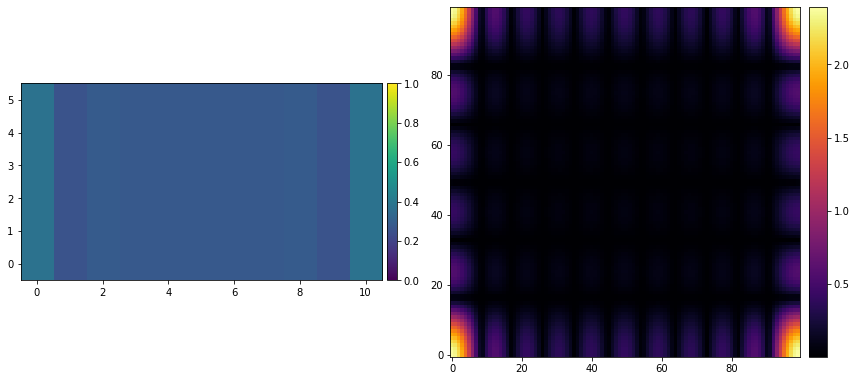

In [5]:
aspect = 20
pad_fraction = 0.5

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

im = ax[0].imshow(rydberg_density.T, cmap='viridis', origin="lower", vmin=0, vmax=1)

divider = make_axes_locatable(ax[0])
width = axes_size.AxesY(ax[0], aspect=1./aspect)
pad = axes_size.Fraction(pad_fraction, width)
cax = divider.append_axes("right", size=width, pad=pad)
plt.colorbar(im, cax=cax)

im = ax[1].imshow(np.abs(ft).T, cmap='inferno', origin="lower")

divider = make_axes_locatable(ax[1])
width = axes_size.AxesY(ax[1], aspect=1./aspect)
pad = axes_size.Fraction(pad_fraction, width)
cax = divider.append_axes("right", size=width, pad=pad)
plt.colorbar(im, cax=cax)

plt.tight_layout()
plt.show()

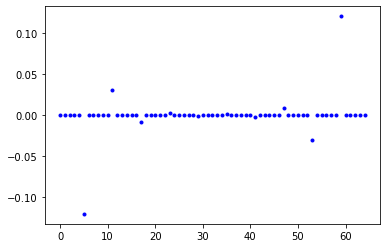

In [6]:
plt.plot(np.diff(rydberg_density.flatten()), 'b.')
plt.show()

In [7]:
m = 0
temp = []
for ii, d in enumerate(rydberg_density.flatten()):
    m += (d - 1/2)* (-1) ** ii
    temp.append((d - 1/2)* (-1) ** ii)
print(m)

-6.616757140565088e-05


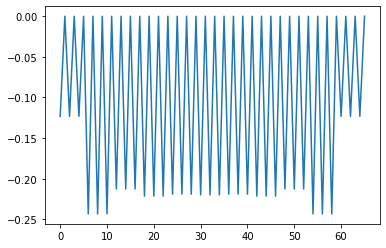

In [8]:
plt.plot(np.cumsum(temp))
plt.show()